In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [97]:
# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rescale=1./255)

training_set=datagen.flow_from_directory(r"E:\ml1\train",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
test_set=datagen.flow_from_directory(r"E:\ml1\test",
                                                target_size=(64,64), 
                                               batch_size=100,
                                               class_mode = 'categorical')
# class_mode='categorical' if you have more than 2 classses

Found 4024 images belonging to 6 classes.
Found 1389 images belonging to 6 classes.


In [98]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 6, 6, 64)       

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stopping= EarlyStopping(monitor='accuracy',patience =3)

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [102]:
model.fit(training_set, epochs=30, validation_data=test_set,callbacks=[early_stopping])

Epoch 1/30
41/41 [==============================] - 27s 628ms/step - loss: 1.4165 - accuracy: 0.4863 - val_loss: 1.3071 - val_accuracy: 0.5364
Epoch 2/30
41/41 [==============================] - 26s 644ms/step - loss: 1.0324 - accuracy: 0.6325 - val_loss: 0.8409 - val_accuracy: 0.6825
Epoch 3/30
41/41 [==============================] - 26s 641ms/step - loss: 0.7954 - accuracy: 0.7179 - val_loss: 0.7112 - val_accuracy: 0.7559
Epoch 4/30
41/41 [==============================] - 26s 638ms/step - loss: 0.6645 - accuracy: 0.7667 - val_loss: 0.6280 - val_accuracy: 0.7797
Epoch 5/30
41/41 [==============================] - 26s 653ms/step - loss: 0.5768 - accuracy: 0.7955 - val_loss: 0.7040 - val_accuracy: 0.7322
Epoch 6/30
41/41 [==============================] - 26s 635ms/step - loss: 0.4831 - accuracy: 0.8263 - val_loss: 0.6004 - val_accuracy: 0.7912
Epoch 7/30
41/41 [==============================] - 26s 641ms/step - loss: 0.4456 - accuracy: 0.8330 - val_loss: 0.5024 - val_accuracy: 0.8301

In [103]:
from tensorflow.keras.preprocessing import image

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 69ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

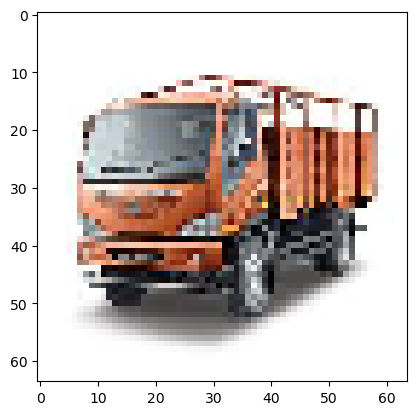

In [104]:
img = image.load_img(r"E:\ml\Test set\Heavy\images (55).jpg"
                    ,target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
print(test_img.shape)
# reshape to add 1 row
test_img = test_img.reshape(1,64,64,3)
print(test_img.shape)
model.predict(test_img)

In [112]:
training_set.class_indices

{'bike': 0, 'bus': 1, 'cycle': 2, 'sedan': 3, 'suv': 4, 'truck': 5}

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 21ms/step


array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

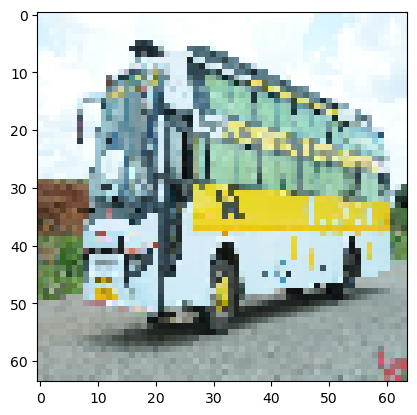

In [111]:
img = image.load_img(r"E:\ml\5483_35_2.png"
                    ,target_size = (64,64))
plt.imshow(img);
test_img = np.asarray(img)
print(test_img.shape)
# reshape to add 1 row
test_img = test_img.reshape(1,64,64,3)
print(test_img.shape)
model.predict(test_img)